# Recommendation model for Lyft
___

Rider Cancellations create bad experiences for both Drivers and Riders on the Lyft platform and impact Lyft financially. The Rider Cancels team is working to develop a new cancellation policy for Lyft, determining how and when riders should be charged a fee for cancelling their ride requests.



The goal of this book is to **develop and recommend cancellation fee policy for Lyft**.
___
We will start first by doing the Exploratory data analysis on the given dataset. After that, we will move on to Feature engineering followed by data modeling. 

Before doing the modeling, we will try to understand the data and try to interpret various relationship between the variables.

___


### Exploratory Data Analysis 

#### Let's start by first importing all the necessary libraries for exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

#### Read data from "ride_data.csv" and "experiment_data.csv" files

In [2]:

ride_data = pd.read_csv("rider_data.csv")               

experiment_data = pd.read_csv("experimental_data.csv")


#### Let's look at the first few rows of the data

In [3]:
ride_data.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,arrived_at_local,picked_up_at_local,dropped_off_at_local,actual_time_to_arrival,cancellation_flag,rider_request_number
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,2019-05-04 14:09:21.508 America/Los_Angeles,2019-05-04 14:10:02.000 America/Los_Angeles,2019-05-04 14:22:34.000 America/Los_Angeles,37.0,0,1
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,NaN,standard,77.76,1.00,60.0,NaN,2019-05-03 15:26:37.000 America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,1,1
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,2019-05-10 19:37:22.502 America/Los_Angeles,2019-05-10 19:37:24.000 America/Los_Angeles,2019-05-10 19:44:22.000 America/Los_Angeles,621.0,0,2
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,2019-05-10 23:42:24.283 America/Los_Angeles,2019-05-10 23:42:28.000 America/Los_Angeles,2019-05-11 00:02:06.000 America/Los_Angeles,171.0,0,1
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,2019-05-08 14:03:34.987 America/Los_Angeles,2019-05-08 14:03:39.000 America/Los_Angeles,2019-05-08 14:18:35.000 America/Los_Angeles,610.0,0,1


In [4]:
experiment_data.head()

,rider_id,variant,cancel_penalty
0,+++3990cLNPGgaPm+ripGg==,control,5.0
1,+++stf7DqWcT8LMTYbXrwA==,control,5.0
2,++07zTPYFhvA5Ug72kRd0w==,treatment1,3.0
3,++08hetKFBNoOO5XHAH/5A==,treatment2,1.0
4,++0YwCvnfyMWSNH3wpyP1g==,treatment2,1.0


#### Let's have a closer look at the two dataframes

In [5]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530756 entries, 0 to 530755
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rider_id        530756 non-null  object 
 1   variant         530756 non-null  object 
 2   cancel_penalty  530756 non-null  float64
dtypes: float64(1), object(2)
memory usage: 12.1+ MB


In [6]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402312 entries, 0 to 1402311
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ride_id                  1402312 non-null  object 
 1   rider_id                 1402312 non-null  object 
 2   driver_id                1367819 non-null  object 
 3   ride_type                1402312 non-null  object 
 4   upfront_fare             1397335 non-null  float64
 5   rider_paid_amount        1402312 non-null  float64
 6   eta_to_rider_pre_match   1334909 non-null  float64
 7   eta_to_rider_post_match  1367790 non-null  float64
 8   requested_at_local       1402312 non-null  object 
 9   accepted_at_local        1367790 non-null  object 
 10  arrived_at_local         1193519 non-null  object 
 11  picked_up_at_local       1193511 non-null  object 
 12  dropped_off_at_local     1193487 non-null  object 
 13  actual_time_to_arrival   1193491 non-null 

In [7]:
print("No. of Unique rides   : ",ride_data["ride_id"].nunique())
print("No. of Unique riders  : ",ride_data["rider_id"].nunique())
print("No. of Unique drivers : ",ride_data["driver_id"].nunique())

No. of Unique rides   :  1402312
No. of Unique riders  :  530756
No. of Unique drivers :  36385


From observing the **ride_data**, we can see that there are 1402312 unique rides (no missing values in ride_id) of 530756 unique riders (rider_id is repeated), and 36385 unique drivers.

From observing the **experiment_data**, we can see that all 530756 riders with their unique rider_id are being assigned to different variant in the experiment_data.

___

Now we will **merge the dataset** so that every rider_id gets its respective variant and cancel_penalty.

- We will use the conditional merge from pandas, to join the aforementioned dataframes.

- It is also clear that, we have no missing values in the experiment_data.

- This way, we will only need to address one dataframe throughout our analysis.


In [8]:
ride_data = ride_data.merge(experiment_data, how='inner', left_on=['rider_id'], right_on=['rider_id'])

In [9]:
ride_data.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,arrived_at_local,picked_up_at_local,dropped_off_at_local,actual_time_to_arrival,cancellation_flag,rider_request_number,variant,cancel_penalty
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,2019-05-04 14:09:21.508 America/Los_Angeles,2019-05-04 14:10:02.000 America/Los_Angeles,2019-05-04 14:22:34.000 America/Los_Angeles,37.0,0,1,treatment1,3.0
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,NaN,standard,77.76,1.00,60.0,NaN,2019-05-03 15:26:37.000 America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,1,1,treatment2,1.0
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,2019-05-10 19:37:22.502 America/Los_Angeles,2019-05-10 19:37:24.000 America/Los_Angeles,2019-05-10 19:44:22.000 America/Los_Angeles,621.0,0,2,treatment2,1.0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,2019-05-10 23:42:24.283 America/Los_Angeles,2019-05-10 23:42:28.000 America/Los_Angeles,2019-05-11 00:02:06.000 America/Los_Angeles,171.0,0,1,treatment2,1.0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,2019-05-08 14:03:34.987 America/Los_Angeles,2019-05-08 14:03:39.000 America/Los_Angeles,2019-05-08 14:18:35.000 America/Los_Angeles,610.0,0,1,treatment2,1.0


In [10]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402312 entries, 0 to 1402311
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ride_id                  1402312 non-null  object 
 1   rider_id                 1402312 non-null  object 
 2   driver_id                1367819 non-null  object 
 3   ride_type                1402312 non-null  object 
 4   upfront_fare             1397335 non-null  float64
 5   rider_paid_amount        1402312 non-null  float64
 6   eta_to_rider_pre_match   1334909 non-null  float64
 7   eta_to_rider_post_match  1367790 non-null  float64
 8   requested_at_local       1402312 non-null  object 
 9   accepted_at_local        1367790 non-null  object 
 10  arrived_at_local         1193519 non-null  object 
 11  picked_up_at_local       1193511 non-null  object 
 12  dropped_off_at_local     1193487 non-null  object 
 13  actual_time_to_arrival   1193491 non-null 

In [11]:
ride_data['requested_at_local'].min(), ride_data['requested_at_local'].max()

('2019-04-14 17:00:01.000 America/Los_Angeles',
 '2019-05-26 16:59:56.000 America/Los_Angeles')

From the output above, we can clearly see that given dataset has **first requested ride on April 14, 2019** and the **last requested ride on May 26, 2019**

In [12]:
count_=ride_data["requested_at_local"].str.count("America/Los_Angeles").sum()
print(count_)

1402312



The given data has only one timezone, **"America/Los_Angeles"**, we will split all the timestamp variable in different columns


We will first remove "America/Los_Angeles" and then convert the timestamp variable in **datetime format.**



In [13]:
ride_data["requested_at_local"]=ride_data["requested_at_local"].str.replace(" America/Los_Angeles","")
ride_data["accepted_at_local"]=ride_data["accepted_at_local"].str.replace(" America/Los_Angeles","")
ride_data["arrived_at_local"]=ride_data["arrived_at_local"].str.replace(" America/Los_Angeles","")
ride_data["picked_up_at_local"]=ride_data["picked_up_at_local"].str.replace(" America/Los_Angeles","")
ride_data["dropped_off_at_local"]=ride_data["dropped_off_at_local"].str.replace(" America/Los_Angeles","")



We will use **str.replace** for removing "America/Los_Angeles" from the column values and then use pandas **to_datetime()** function for the conversion

In [14]:
ride_data["requested_at_local"] = pd.to_datetime(ride_data["requested_at_local"])
ride_data["accepted_at_local"] = pd.to_datetime(ride_data["accepted_at_local"])
ride_data["arrived_at_local"] = pd.to_datetime(ride_data["arrived_at_local"])
ride_data["picked_up_at_local"] = pd.to_datetime(ride_data["picked_up_at_local"])
ride_data["dropped_off_at_local"] = pd.to_datetime(ride_data["dropped_off_at_local"])

In [15]:
ride_data.dtypes

ride_id                            object
rider_id                           object
driver_id                          object
ride_type                          object
upfront_fare                      float64
rider_paid_amount                 float64
eta_to_rider_pre_match            float64
eta_to_rider_post_match           float64
requested_at_local         datetime64[ns]
accepted_at_local          datetime64[ns]
arrived_at_local           datetime64[ns]
picked_up_at_local         datetime64[ns]
dropped_off_at_local       datetime64[ns]
actual_time_to_arrival            float64
cancellation_flag                   int64
rider_request_number                int64
variant                            object
cancel_penalty                    float64
dtype: object

#### Splitting all the time stamps in readable format

This way, we can get a good grasp of the time, date, day, and month. Datetime libraries provide various options to retrive the exact date, day of the year, day of the week etc., from the timestamp value.

(Note that we aren't creating a seperate column for the year since it is in the same year, 2019)


In [17]:
ride_data["requested_day_of_year"] = ride_data["requested_at_local"].dt.dayofyear
ride_data["requested_on_day"] = ride_data["requested_at_local"].dt.weekday
ride_data["requested_at_time"] = ride_data["requested_at_local"].dt.time
ride_data["requested_at_hour"] = ride_data["requested_at_local"].dt.hour

In [19]:
ride_data["accepted_day_of_year"] = ride_data["accepted_at_local"].dt.dayofyear
ride_data["accepted_on_day"] = ride_data["accepted_at_local"].dt.weekday
ride_data["accepted_at_time"] = ride_data["accepted_at_local"].dt.time
ride_data["accepted_at_hour"] = ride_data["accepted_at_local"].dt.hour

In [20]:
ride_data[ride_data["cancellation_flag"]==1].isnull().sum(), ride_data[ride_data["cancellation_flag"]==1].shape

(ride_id                         0
 rider_id                        0
 driver_id                   32751
 ride_type                       0
 upfront_fare                  688
 rider_paid_amount               0
 eta_to_rider_pre_match      12245
 eta_to_rider_post_match     32752
 requested_at_local              0
 accepted_at_local           32752
 arrived_at_local           207050
 picked_up_at_local         207050
 dropped_off_at_local       207050
 actual_time_to_arrival     207050
 cancellation_flag               0
 rider_request_number            0
 variant                         0
 cancel_penalty                  0
 requested_day_of_year           0
 requested_on_day                0
 requested_at_time               0
 requested_at_hour               0
 accepted_day_of_year        32752
 accepted_on_day             32752
 accepted_at_time            32752
 accepted_at_hour            32752
 dtype: int64, (207050, 26))

In [21]:
ride_data.groupby("cancellation_flag")["requested_at_local", 
                                       "accepted_at_local", "arrived_at_local", 
                                       "picked_up_at_local"].count()

,requested_at_local,accepted_at_local,arrived_at_local,picked_up_at_local
cancellation_flag,,,,
0,1195262,1193492,1193519,1193511
1,207050,174298,0,0



#### From the above output, we know,

- Total Rides cancelled after the request was made:   207050 


- Total Rides cancelled after the request was accepted:   174298


- Total Rides cancelled after the driver arrived:   0 


- Total Rides cancelled after the driver picked up the passenger:   0 


#### It is clear that, for 207050 cancellations, there is not a single observation in which the rider has arrived at the location and then the passenger has cancelled the ride.

- It shows that, we don't need "arrived_at_local", "picked_up_at_local", "dropped_off_at_local", and "actual_time_to_arrival" variables from this dataset, to develop a cancellation policy.

- Also, since we have already splitted the timestamp variable in day_of_year, day_of_week, time, hour, we don't need "requested_at_local", and "accepted_at_local" variables

In [22]:
ride_data.drop(["arrived_at_local", "picked_up_at_local", 
                "dropped_off_at_local", "actual_time_to_arrival",
               "requested_at_local", "accepted_at_local"], axis = 1, inplace=True)

In [23]:
ride_data.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,cancellation_flag,rider_request_number,variant,cancel_penalty,requested_day_of_year,requested_on_day,requested_at_time,requested_at_hour,accepted_day_of_year,accepted_on_day,accepted_at_time,accepted_at_hour
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,0,1,treatment1,3.0,124,5,14:08:33,14,124.0,5.0,14:08:43.775000,14.0
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,NaN,standard,77.76,1.00,60.0,NaN,1,1,treatment2,1.0,123,4,15:26:37,15,NaN,NaN,NaT,NaN
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,0,2,treatment2,1.0,130,4,19:26:29,19,130.0,4.0,19:27:00.632000,19.0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,0,1,treatment2,1.0,130,4,23:39:07,23,130.0,4.0,23:39:32.725000,23.0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,0,1,treatment2,1.0,128,2,13:52:08,13,128.0,2.0,13:53:24.871000,13.0


In [24]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402312 entries, 0 to 1402311
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ride_id                  1402312 non-null  object 
 1   rider_id                 1402312 non-null  object 
 2   driver_id                1367819 non-null  object 
 3   ride_type                1402312 non-null  object 
 4   upfront_fare             1397335 non-null  float64
 5   rider_paid_amount        1402312 non-null  float64
 6   eta_to_rider_pre_match   1334909 non-null  float64
 7   eta_to_rider_post_match  1367790 non-null  float64
 8   cancellation_flag        1402312 non-null  int64  
 9   rider_request_number     1402312 non-null  int64  
 10  variant                  1402312 non-null  object 
 11  cancel_penalty           1402312 non-null  float64
 12  requested_day_of_year    1402312 non-null  int64  
 13  requested_on_day         1402312 non-null 


#### Let's look at some plots and grouped tables with aggregated values, and try to understand relationship between different variables



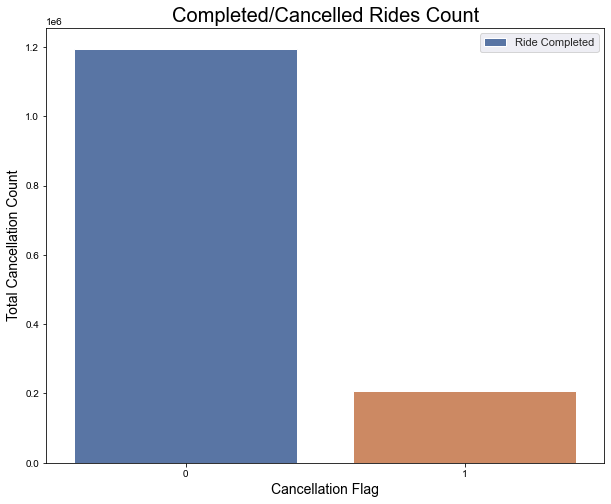

0    1195262
1     207050
Name: cancellation_flag, dtype: int64


In [25]:
f, ax = plt.subplots(figsize=(10, 8))

sb.set(style="darkgrid")
sb.countplot(x="cancellation_flag", data=ride_data, ax=ax)
ax.set_ylabel('Total Cancellation Count', size = 14)
ax.set_xlabel('Cancellation Flag', size = 14)
ax.set_title('Completed/Cancelled Rides Count', size = 20)
plt.legend(labels=["Ride Completed", "Ride Cancelled"])
plt.show()

print(ride_data["cancellation_flag"].value_counts())




#### From the above output, we know,

Of the **total 1402312 rides**, there have been **207050 ride cancellation between** the period of **April 14, 2019 and May 26, 2019.**

In [26]:
print(ride_data.groupby("cancellation_flag")["rider_paid_amount"].sum().astype(np.int64))

cancellation_flag
0    17983989
1      536576
Name: rider_paid_amount, dtype: int64




#### From the above output, we know,

- Total Revenue from cancelled rides (penalty): **USD 5,36,576**


- Total Revenue from completed rides: **USD 1,79,83,989**


- Of the total revenue from April 14, 2019 to May 26, 2019, **cancelled rides form 2.98 % of the revenue.**



In [27]:
print(ride_data.groupby(["ride_type", "cancellation_flag"])["ride_id"].count())

ride_type  cancellation_flag
shared     0                    395843
           1                     83355
standard   0                    799419
           1                    123695
Name: ride_id, dtype: int64



#### From the above output, we know,

No. of shared rides cancelled    :   83355

No. of standard rides cancelled  :   123695


In [28]:
print(ride_data.groupby(["ride_type", "cancellation_flag"]).sum()["rider_paid_amount"])

ride_type  cancellation_flag
shared     0                     3829143.02
           1                      221365.00
standard   0                    14154846.75
           1                      315211.00
Name: rider_paid_amount, dtype: float64


#### From the above output, we know,

For SHARED rides:


- Total Revenue from CANCELLED rides  : **USD 2,21,365.00**



- Total Revenue from COMPLETED rides  : **USD 3,829,143.02**



For STANDARD rides:


- Total Revenue from CANCELLED rides: **USD 3,15,211.00**


- Total Revenue from COMPLETED rides: **USD 14,154,846.75**



In [29]:
ride_data.dtypes

ride_id                     object
rider_id                    object
driver_id                   object
ride_type                   object
upfront_fare               float64
rider_paid_amount          float64
eta_to_rider_pre_match     float64
eta_to_rider_post_match    float64
cancellation_flag            int64
rider_request_number         int64
variant                     object
cancel_penalty             float64
requested_day_of_year        int64
requested_on_day             int64
requested_at_time           object
requested_at_hour            int64
accepted_day_of_year       float64
accepted_on_day            float64
accepted_at_time            object
accepted_at_hour           float64
dtype: object

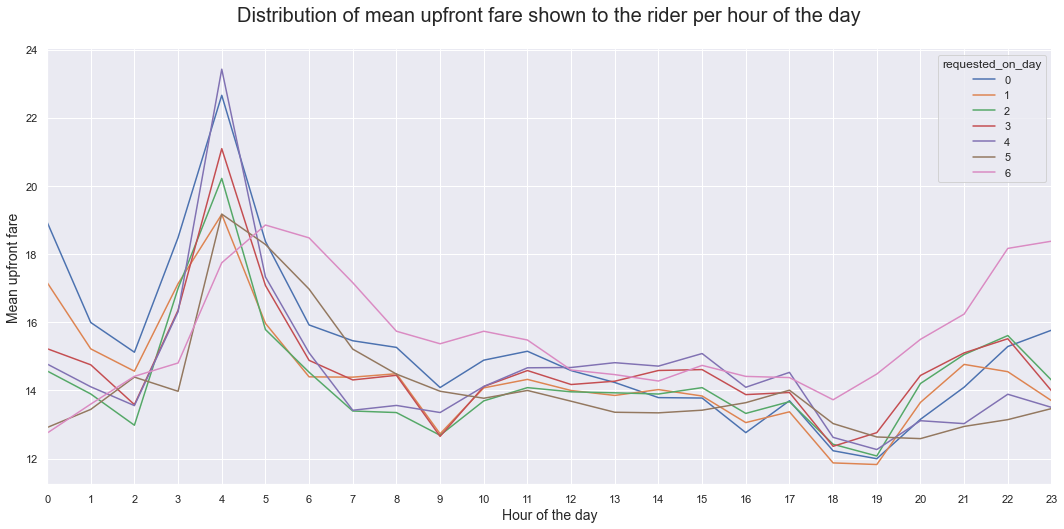

In [30]:
f, ax = plt.subplots(figsize=(18, 8))
hour_summary = pd.DataFrame(ride_data.groupby(['requested_on_day', 'requested_at_hour'])
                            ['upfront_fare'].mean())
hour_summary.reset_index(inplace=True)
hour_summary['unit'] = 1
ax = sb.tsplot(data = hour_summary, time = 'requested_at_hour', unit = 'unit', 
                condition = 'requested_on_day', value = 'upfront_fare')
sb.set_context('poster')
sb.set(style='white')
sb.despine(bottom=False)

ax.set_title('Distribution of mean upfront fare shown to the rider per hour of the day\n', size = 20)
ax.set_ylabel('Mean upfront fare', size = 14)
ax.set_xlabel('Hour of the day', size = 14)
ax.set(xticks=np.arange(0,24))

plt.show()



#### From the above graph, it is clear that,


Upfront fare shown to the rider is more in the early hours of the day. This makes sense as less riders are present in that timeframe, to meet the supply and demand equality, upfront fare during the early hours of the day is generally more.



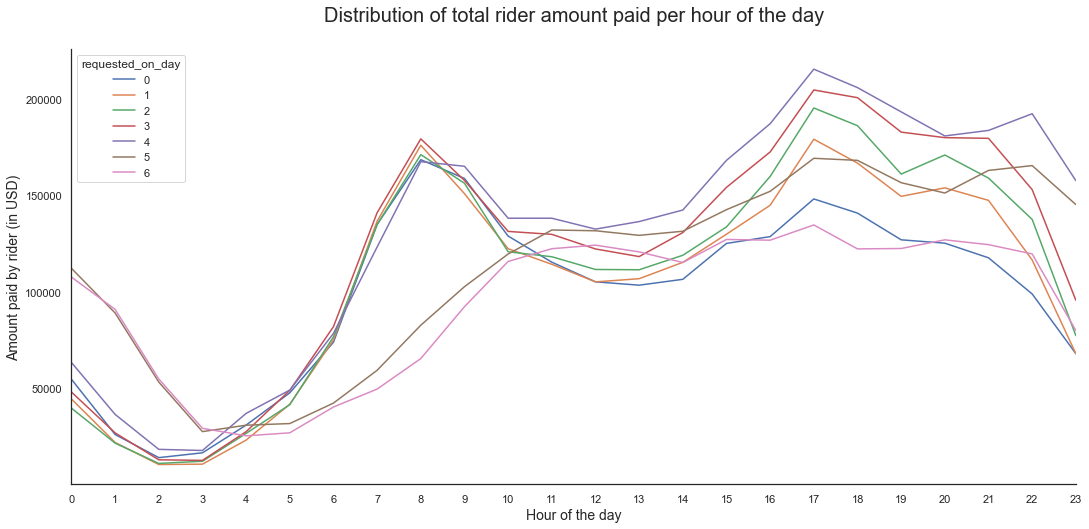

In [31]:
f, ax = plt.subplots(figsize=(18, 8))
hour_summary = pd.DataFrame(ride_data.groupby(['requested_on_day', 'requested_at_hour'])
                            ['rider_paid_amount'].sum())
hour_summary.reset_index(inplace=True)
hour_summary['unit'] = 1
ax = sb.tsplot(data = hour_summary, time = 'requested_at_hour', unit = 'unit', 
                condition = 'requested_on_day', value = 'rider_paid_amount')
sb.set_context('poster')
sb.set(style='white')
sb.despine(bottom=False)

ax.set_title('Distribution of total rider amount paid per hour of the day\n', size = 20)
ax.set_ylabel('Amount paid by rider (in USD)', size = 14)
ax.set_xlabel('Hour of the day', size = 14)
ax.set(xticks=np.arange(0,24))
plt.show()



#### As suspected, and confirmed from the above output, we can clearly see that,

Revenue generation from both completed and cancelled rides is more during the peak hours in morning and in the evening. You can see the red and green line that represents the weekend, where the revenue generated is low during the morning but then tends to get back on.


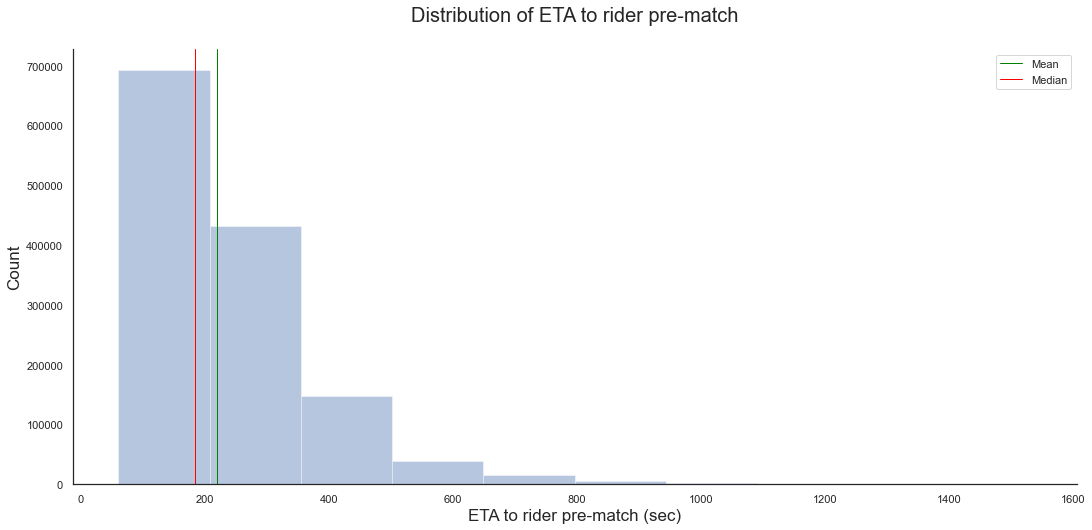

In [32]:
f, ax = plt.subplots(figsize=(18, 8))
ax = sb.distplot(ride_data['eta_to_rider_pre_match'], hist=True, kde=False, bins=10)
sb.set_context('poster')
sb.set(style='white')
sb.despine(bottom=False)
ax.set_title('Distribution of ETA to rider pre-match\n', size = 20)
ax.set_ylabel('Count', size = 17)
ax.set_xlabel('ETA to rider pre-match (sec)', size = 17)
ax.axvline(ride_data['eta_to_rider_pre_match'].mean(), color = 'green', linewidth = 1)
ax.axvline(ride_data['eta_to_rider_pre_match'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.show()

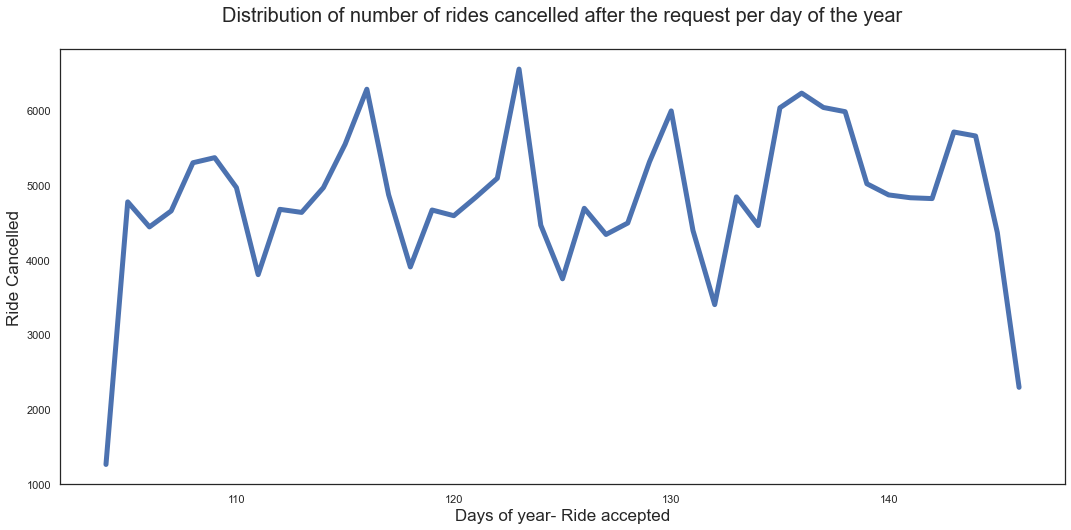

From the above graph, we can see, the maximum number of rides got cancelled on following day of year:



,cancellation_flag
requested_day_of_year,
123,6548


In [33]:
f, ax = plt.subplots(figsize=(18, 8))
ride_data.groupby(["requested_day_of_year"]).sum()["cancellation_flag"].plot(ax=ax, linewidth=5)
plt.xlabel("Days of year- Ride accepted", size = 17)
ax.set_title('Distribution of number of rides cancelled after the request per day of the year\n', size = 20)
plt.ylabel("Ride Cancelled", size = 17)
plt.show()

df_dayofyear = pd.DataFrame(ride_data.groupby(["requested_day_of_year"]).sum()["cancellation_flag"])
print("From the above graph, we can see, the maximum number of rides got cancelled on following day of year:\n",)
df_dayofyear[df_dayofyear["cancellation_flag"]==df_dayofyear["cancellation_flag"].max()]



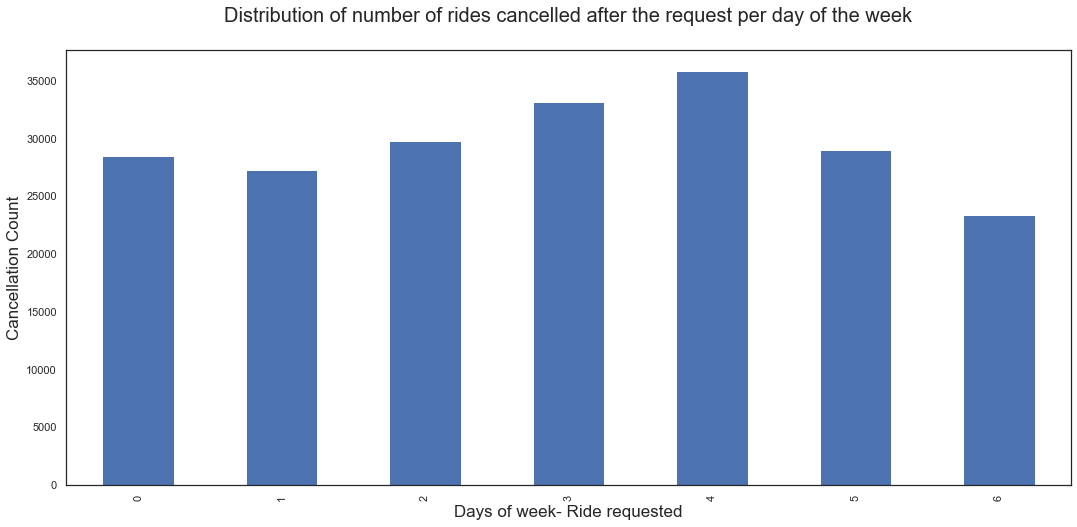

From the above graph, we can see, the maximum number of rides got cancelled on following day of week:



,cancellation_flag
requested_on_day,
4,35869


In [34]:
f, ax = plt.subplots(figsize=(18, 8))
ride_data.groupby("requested_on_day").sum()["cancellation_flag"].plot.bar(ax=ax)
plt.xlabel("Days of week- Ride requested", size =17)
plt.ylabel("Cancellation Count", size =17)
ax.set_title('Distribution of number of rides cancelled after the request per day of the week\n', size = 20)
plt.show()


df_dayofweek = pd.DataFrame(ride_data.groupby("requested_on_day").sum()["cancellation_flag"])
print("From the above graph, we can see, the maximum number of rides got cancelled on following day of week:\n",)
df_dayofweek[df_dayofweek["cancellation_flag"]==df_dayofweek["cancellation_flag"].max()]



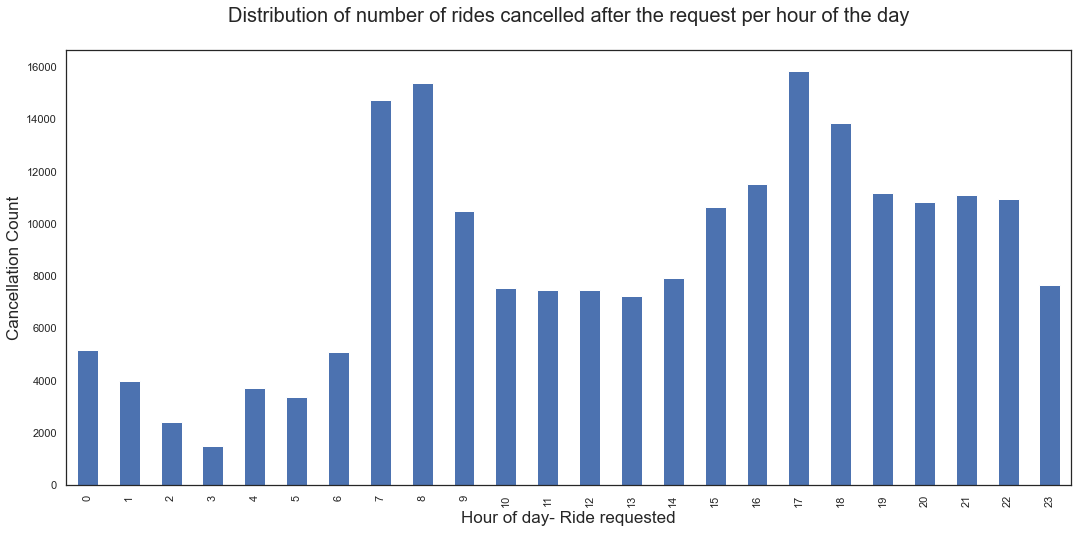

In [35]:
f, ax = plt.subplots(figsize=(18, 8))
ride_data.groupby("requested_at_hour").sum()["cancellation_flag"].plot.bar(ax=ax)
plt.xlabel("Hour of day- Ride requested", size =17)
plt.ylabel("Cancellation Count", size =17)
ax.set_title('Distribution of number of rides cancelled after the request per hour of the day\n', size = 20)

plt.show()

df_hourofday = pd.DataFrame(ride_data.groupby("requested_at_hour").sum()["cancellation_flag"])


#### The above outputs helps us understand the following:

- Friday is the day when majority of ride cancellation occurs. This is followed by Thursday.



- 123rd day of the year experienced the maximum ride cancellation. Also, the data is only for the limited time frame, from April 14, 2019 to May 26, 2019



- We also understood that from 7th hour to 9th hour, we have highest cancellation. This cancellation rate drops down by 39.39% from 9th hour. It again experiences a 34.20% increase from 14th to 15th hour, and then keeps increasing till 22th hour. This makes sense, as during the peak hours, people tend to go to work and there will be a traffic surge during these hours. Also, during the later half of the day, people tend to come back from work, or go to dinner etc.



#### Let's look at the revenue distribution during the days of week and hours of day from cancelled and completed rides

In [36]:
print(ride_data.groupby(["requested_on_day", "cancellation_flag"]).sum()["rider_paid_amount"])

requested_on_day  cancellation_flag
0                 0                    2292604.07
                  1                      74617.00
1                 0                    2443434.60
                  1                      69785.00
2                 0                    2578520.63
                  1                      77181.00
3                 0                    2808045.67
                  1                      86595.00
4                 0                    3037501.67
                  1                      93279.00
5                 0                    2617349.75
                  1                      74245.00
6                 0                    2206533.38
                  1                      60874.00
Name: rider_paid_amount, dtype: float64


#### From the above output, it is clear that,

- It is clear that, **Friday** experiences the highest revenue generation from both completed and cancelled rides. This is followed by Thursday.


#### Now, let's move ahead and have a closer look at the experiment_data and cancelled rides

In [37]:
print(ride_data.groupby("variant").count()["ride_id"])

variant
control       460976
treatment1    470449
treatment2    470887
Name: ride_id, dtype: int64


#### From the above output, 
We get to know the count distribution of all the rides in ride_data, in control, treatment-1, and treatment-2.

In [38]:
print("$ "+ride_data.groupby("variant")["cancel_penalty"].sum().astype(str))

df_exp = pd.DataFrame(ride_data.groupby(["variant","cancel_penalty"])["rider_paid_amount"].sum())


variant
control       $ 2304880.0
treatment1    $ 1411347.0
treatment2     $ 470887.0
Name: cancel_penalty, dtype: object


#### From the above output, 
We get to know the revenue distribution from control, treatment-1, and treatment-2 group.

In [39]:
print(ride_data.groupby("variant").mean()["cancel_penalty"])

variant
control       5.0
treatment1    3.0
treatment2    1.0
Name: cancel_penalty, dtype: float64


#### From the above output, we understand that,

- Control group had cancel_penalty of 5 USD

- Treatment1 group had cancel_penalty of 3 USD

- Treatment2 group had cancel_penalty of 1 USD


___

#### We will use LabelEncoder to encode ride_type variable.

In order to model, we need to reformat ride_type variable in numeric format

Label Encoding can be achieved using python's sklearn library. It is a very efficient tool for encoding the levels of categorical features in different numeric values. 


LabelEncoder encode labels with a value from 0 to n-1 where n is the number of distinct labels. If a label is repeated, it assigns the same value as assigned earlier to that label.

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()                        # instantiate label encoder
ride_type_cat = ride_data["ride_type"]                # Convert our ride_type variable into numeric


#### We need to encode the ride_type variable, so it gives a binary response

In [41]:

ridetype_encoded = label_encoder.fit_transform(ride_type_cat)

ridetype_DF = pd.DataFrame(ridetype_encoded, columns=['standard_ridetype'])
ridetype_DF.head()


,standard_ridetype
0,1
1,1
2,1
3,1
4,1


In [42]:
ride_data = pd.concat([ride_data, ridetype_DF], 
                         axis = 1, verify_integrity = True)

In [43]:
ride_data.drop("ride_type", axis = 1, inplace = True)

In [44]:
ride_data.head()

,ride_id,rider_id,driver_id,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,cancellation_flag,rider_request_number,variant,cancel_penalty,requested_day_of_year,requested_on_day,requested_at_time,requested_at_hour,accepted_day_of_year,accepted_on_day,accepted_at_time,accepted_at_hour,standard_ridetype
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,12.13,17.40,60.0,21.0,0,1,treatment1,3.0,124,5,14:08:33,14,124.0,5.0,14:08:43.775000,14.0,1
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,NaN,77.76,1.00,60.0,NaN,1,1,treatment2,1.0,123,4,15:26:37,15,NaN,NaN,NaT,NaN,1
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,7.82,8.17,360.0,541.0,0,2,treatment2,1.0,130,4,19:26:29,19,130.0,4.0,19:27:00.632000,19.0,1
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,14.76,14.82,60.0,126.0,0,1,treatment2,1.0,130,4,23:39:07,23,130.0,4.0,23:39:32.725000,23.0,1
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,18.05,17.78,360.0,587.0,0,1,treatment2,1.0,128,2,13:52:08,13,128.0,2.0,13:53:24.871000,13.0,1


#### After the encoding, we need to check what does 1 represents and what does 0 does.


#### In our case,


- 1  equals Standard ride_type


- 0  equals Shared ride_type


#### We have named the column "standard_ridetype" for easy understanding.


- We then concatenated the two dataframes.


- Once we have a binary variable for our ride_type where 1 represents standard and 0 represents shared, we no longer require ride_type variable, so we will drop that column.
___

#### We don't need driver_id, since we have already mapped the varient category for different rides and driver_id won't have any effect on the cancellation policy.

In [45]:
ride_data.drop("driver_id", axis = 1, inplace = True)

#### Before we start modeling, we need to check if we have any missing values in feature set and if present, we need to handle it.

In [46]:
ride_data.isnull().sum()

ride_id                        0
rider_id                       0
upfront_fare                4977
rider_paid_amount              0
eta_to_rider_pre_match     67403
eta_to_rider_post_match    34522
cancellation_flag              0
rider_request_number           0
variant                        0
cancel_penalty                 0
requested_day_of_year          0
requested_on_day               0
requested_at_time              0
requested_at_hour              0
accepted_day_of_year       34522
accepted_on_day            34522
accepted_at_time           34522
accepted_at_hour           34522
standard_ridetype              0
dtype: int64


#### The following "analyze_NA" function returns a pandas dataframe that denotes all the total NA values and percentage of NA values.

The column names are mentioned on the index

In [47]:
def analyze_NA(data):
    
    null_sum = data.isnull().sum()                      # instantiate columns for missing data
    
    total_ = null_sum.sort_values(ascending=False)
    
    percentage = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # Concatenate along the columns to create the complete dataframe
    
    datafr_NA = pd.concat([total_, percentage], axis=1, keys=['Number of NA', 'Percentage of NA'])
    
    # Drop rows that don't have any missing data; omit if you want to keep all rows
    
    datafr_NA = datafr_NA[ (datafr_NA.T != 0).any() ]
    
    return datafr_NA

In [48]:
analyze_NA(ride_data)

,Number of NA,Percentage of NA
eta_to_rider_pre_match,67403,4.81
accepted_at_time,34522,2.46
accepted_on_day,34522,2.46
accepted_day_of_year,34522,2.46
accepted_at_hour,34522,2.46
eta_to_rider_post_match,34522,2.46
upfront_fare,4977,0.35


#### Let's check how much the missing value in some features constitutes for in the given dataset

In [49]:
print("\nThe missing values in upfront_fare constitutes for",
      (100*(ride_data["upfront_fare"].isnull().sum())/(sum(ride_data["upfront_fare"].shape))).round(2), "%")

print("\nThe missing values in eta_to_rider_pre_match constitutes for",
      (100*(ride_data["eta_to_rider_pre_match"].isnull().sum())/(sum(ride_data["eta_to_rider_pre_match"].shape))
      ).round(2), "%")

print("\nThe missing values in eta_to_rider_post_match constitutes for",
      (100*(ride_data["eta_to_rider_post_match"].isnull().sum())/(sum(ride_data["eta_to_rider_post_match"].shape))
      ).round(2), "%")

print("\nThe missing values in accepted_at_hour constitutes for",
      (100*(ride_data["accepted_at_hour"].isnull().sum())/(sum(ride_data["accepted_at_hour"].shape))).round(2), 
      "%\n")


The missing values in upfront_fare constitutes for 0.35 %

The missing values in eta_to_rider_pre_match constitutes for 4.81 %

The missing values in eta_to_rider_post_match constitutes for 2.46 %

The missing values in accepted_at_hour constitutes for 2.46 %



From the above output, it is clear that the missing values in upfront_fare, eta_to_rider_pre_match, eta_to_rider_post_match, and accepted_at_hour does not exceed 5% of the total data.


Here, instead of dropping these features, **we will replace the missing values with the mean of their respective columns**


In [50]:
ride_data[["upfront_fare", "eta_to_rider_pre_match", 
                 "eta_to_rider_post_match", "accepted_at_hour"]].describe().round(2)

,upfront_fare,eta_to_rider_pre_match,eta_to_rider_post_match,accepted_at_hour
count,1397335.00,1334909.00,1367790.00,1367790.00
mean,14.07,218.63,222.49,13.96
std,10.96,149.91,523.11,5.92
min,2.75,60.00,0.00,0.00
25%,7.56,120.00,113.00,9.00
50%,10.46,184.00,185.00,15.00
75%,15.83,300.00,292.00,19.00
max,629.19,1533.00,584845.00,23.00


In [51]:
ride_data['upfront_fare'].fillna((ride_data['upfront_fare'].mean()), inplace=True)
ride_data['eta_to_rider_pre_match'].fillna((ride_data['eta_to_rider_pre_match'].mean()), inplace=True)
ride_data['eta_to_rider_post_match'].fillna((ride_data['eta_to_rider_post_match'].mean()), inplace=True)
ride_data['accepted_at_hour'].fillna((ride_data['accepted_at_hour'].mean()), inplace=True)

In [52]:
ride_data.isnull().sum()

ride_id                        0
rider_id                       0
upfront_fare                   0
rider_paid_amount              0
eta_to_rider_pre_match         0
eta_to_rider_post_match        0
cancellation_flag              0
rider_request_number           0
variant                        0
cancel_penalty                 0
requested_day_of_year          0
requested_on_day               0
requested_at_time              0
requested_at_hour              0
accepted_day_of_year       34522
accepted_on_day            34522
accepted_at_time           34522
accepted_at_hour               0
standard_ridetype              0
dtype: int64

In [53]:
print("Average upfront fare\t: $",ride_data["upfront_fare"].mean().round(2), 
      "\nRider paid amount\t: $",ride_data["rider_paid_amount"].mean().round(2))

print("\nHighest difference(for completed rides) between Upfront fare (price quoted) and the actual amount charged: $",
      ((ride_data[ride_data["cancellation_flag"]==1]["rider_paid_amount"])-
(ride_data[ride_data["cancellation_flag"]==1]["upfront_fare"])).max())

Average upfront fare	: $ 14.07 
Rider paid amount	: $ 13.21

Highest difference(for completed rides) between Upfront fare (price quoted) and the actual amount charged: $ 2.24


### We will now start with Modeling

I will use Logistic regression to try and predict the cancellation of the ride.


Logistic regression is a statistical method used for predicting binary classes. The outcome or target variable is binary in nature. In our project, we are using Logistic Regression to detect ride cancellation. It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable.


The target variable will be cancellation_flag


The feature set will include:


- upfront_fare


- eta_to_rider_pre_match


- rider_paid_amount


- eta_to_rider_post_match


- cancel_penalty



In [54]:
# Libraries for modelling

from sklearn import datasets, metrics, linear_model, feature_selection, preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import itertools

In [55]:
# Define target and feature set for modelling

X = ride_data[["upfront_fare", "eta_to_rider_pre_match", "eta_to_rider_post_match", "rider_paid_amount", "cancel_penalty"]]

Y = ride_data.cancellation_flag

In [56]:
# Define the scaler

ss = StandardScaler()


# Scaling the feature set

XS = ss.fit_transform(X)


#### Defining our model

In [57]:

LR = LogisticRegression()                     # Using the standard parameters of the model, Instantiate the object

model = LR.fit(XS, Y)                         # Fitting the model with our target and features


#### Determine preditions from the model and print the accuracy of the model

In [58]:
Y_pred = model.predict(XS)

print('Accuracy:', accuracy_score(Y, Y_pred))


Accuracy: 0.9869486961532098


#### Classification report without cross-validation

In [59]:
print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1195262
           1       0.96      0.95      0.96    207050

    accuracy                           0.99   1402312
   macro avg       0.97      0.97      0.97   1402312
weighted avg       0.99      0.99      0.99   1402312



#### Setting the feature importance to a variable

In [60]:
feature_imp = model.coef_


#### Sorting the feature importance

In [61]:
indices_ = np.argsort(np.absolute(feature_imp))


#### Plotting the feature importance

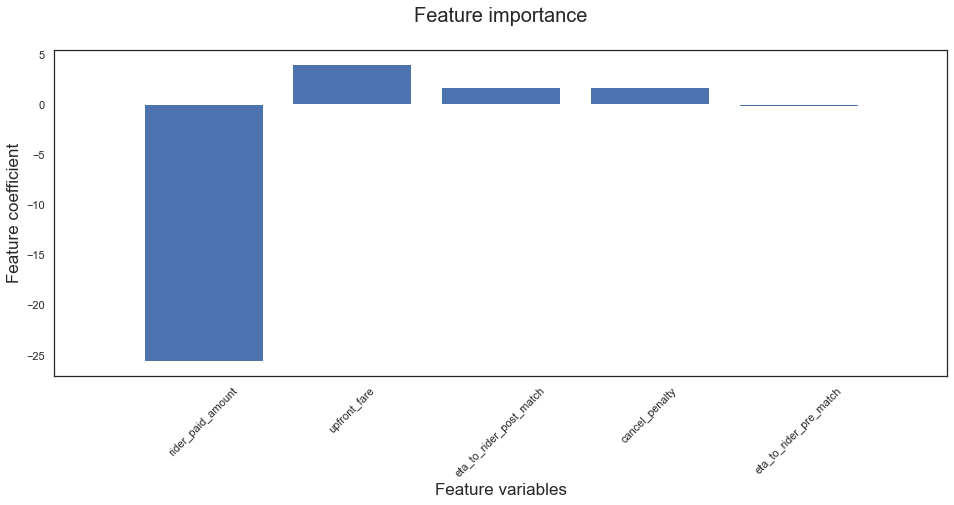

In [62]:
plt.figure(figsize = (16, 6))

plt.title("Feature importance\n", fontsize = 20)

plt.bar(range(XS.shape[1]), feature_imp[0][indices_][0][::-1], align="center")
plt.ylabel('Feature coefficient', size = 17)
plt.xlabel('Feature variables', size = 17)
plt.xticks(range(X.shape[1]), X.columns[indices_][0][::-1], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Create a different dataframe to display the odds ratio

In [63]:
odds_ratio_ = pd.DataFrame(np.transpose(model.coef_), index = X.columns, columns = ["Coeffecient value"])

#### Create odds colums: For this, we need to calculate the exponents of the coefficients

In [64]:
odds_ratio_["Odds"] = odds_ratio_["Coeffecient value"].apply(np.exp)

#### Display the odds ratio

In [65]:
odds_ratio_["Odds"].astype(np.float64).round(3)
odds_ratio_.sort_values(by = 'Odds', ascending = False)

,Coeffecient value,Odds
upfront_fare,3.957700,5.233683e+01
eta_to_rider_post_match,1.743048,5.714737e+00
cancel_penalty,1.698681,5.466730e+00
eta_to_rider_pre_match,-0.219906,8.025942e-01
rider_paid_amount,-25.588700,7.708478e-12


#### From the above output, 

we can clearly see that **upfront_fare** and **eta_to_rider_post_match** comes out on top when predicting the cancellation flag

___

In order to check whether our model works, we will pass in a fictitious passenger
We will make changes to one of the observation and store it in an array, then pass that array through our model 
to see what our model estimates


In [66]:
ride_data[1006:1007]

,ride_id,rider_id,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,cancellation_flag,rider_request_number,variant,cancel_penalty,requested_day_of_year,requested_on_day,requested_at_time,requested_at_hour,accepted_day_of_year,accepted_on_day,accepted_at_time,accepted_at_hour,standard_ridetype
1006,PI4pncdk2enh0YQzK+PFQg==,UmAFzqJ2G+MJyPl2Kld8qQ==,9.62,1.0,535.0,222.490712,1,17,treatment2,1.0,137,4,08:42:07,8,NaN,NaN,NaT,13.960179,0


For the above observation, we can see that the cancellation flag is 1

We will increase the eta_to_rider_pre_match from 535 to 600 sec and then see if the rider cancels the ride.

In [67]:
test_passenger_ = np.array([9.62, 600.0, 222.490712, 1.0, 1.0]).reshape(1,-1)

# Our model will predict the cancellation_flag for the test_passenger

print("Cancellation_flag for above mentioned test_condition: ",LR.predict(test_passenger_))

Cancellation_flag for above mentioned test_condition:  [1]


### Let's start with Cross-validation

Using cross-validation, we will be evaluating following metrics -

- **Accuracy** = (TP+TN)/(TP+FP+TN+FN)

- **Precision** = TP/(TP+FP)

- **Recall** = TP/(TP+FN)


In [ ]:
# List of the metrics that is used for evaluation

metrics_ = ['accuracy', 'precision', 'recall']

# Defining the model


# We will be using L2 regularisation and 4-fold cross-validation

LG = LogisticRegressionCV(penalty = 'l2', cv = 4, solver = 'liblinear') 


# We will then loop through different metrics and print its mean after the 4-fold cross-validation

for metric in metrics_:
    
    score = cross_val_score(LG, XS, Y, scoring = metric, cv = 4)
    
    print(metric, '\t:' , score.mean())



#### I will now plot a confusion matrix, 

- Confusion Matrix is a performance measurement for ML classification problems, where the output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.


- This will help us understand the aforementioned metrics better.


In [ ]:
# Let's start first by Defining a function that will plot confusion matrix

def confusion_matrix_(cm, classes, title='Confusion matrix for Ride-Cancellation\n', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.figsize = (10,10)
    
    plt.title(title, size = 15)
    
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45)
    
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.0
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Cancellation')
    plt.xlabel('Predicted Cancellation')
    plt.show()
    
    return


In [ ]:
# Plot confusion matrix

cnf_matrix = confusion_matrix(Y, model.predict(XS))

plt.figure(figsize=(12,12))

confusion_matrix_(cnf_matrix, classes= ['Low', 'High'])


**The accuracy answers the question - How often is the classifier correct?**

- For this model the accuracy score was 0.98 which is a good for the model, and is above the baseline. 
- It also means that the model is good at predicting cancellation over random choice 


**The precision answers the question - When the classifier predicts yes, how often is it correct?**

- The score for the precision on our model was 0.96


**The recall answers the question - When it is actually yes, how often does the classifier predict yes?**

- The score for the precision on our model was 0.95

### ROC Curve

#### I will now plot a receiver operating characteristic (ROC) curve to look at the area under the curve (AUC)

An ROC curve helps us demonstrates following things:

- The tradeoff between sensitivity and specificity (sensitivity is inversely proportional to specificity).

- The closer the ROC curve follows the left-hand border and the top border, the more accurate is the test.

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
# Plot ROC curve

FPR, TPR, THR = roc_curve(Y, model.predict_proba(XS)[:,1])
ROC_AUC = auc(FPR, TPR)

plt.figure(figsize = [12,12])
plt.plot(FPR, TPR, label='ROC curve (Area = %0.5f)' % ROC_AUC, linewidth = 4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate ', fontsize=17)
plt.title('ROC curve \n', fontsize=20)
plt.legend(loc = "lower right")
plt.show()

____

## Summary:

After analysing ride_data and experiment_data, we were. able to derive a lot of useful insights about the ride cancellation. Different factors played an important role when it comes to rider cancelling a ride. 

By grouping together different features in dataset and after performing some feature engineering, we were able to segregate many important information like revenue generated from cancelled ride (shared and standard), peak hours for ride requests and cancellations, weekday with highest ride cancellation, etc.


An optimised Logistic Regression model was used on the following features:

- **upfront_fare**


- **rider_paid_amount**


- **eta_to_rider_pre_match**


- **eta_to_rider_post_match**


- **cancel_penalty**


With an accuracy score of 0.98, the following features emerged as being the best predictors for identifying whether the rider will cancel the ride or not: 

- **upfront_fare**


- **eta_to_rider_post_match**


This also makes sense, as many riders would cancel their ride after either seeing how much it cost, or after seeing how much time the driver takes to reach at rider's place for the pick.




### Future work

Moving forward with the data analysis, it would be interesting to have- 


- Closer look into the cohort analysis of the driver to gain a better pattern of the driver's cancellation (when they are the one who cancel the ride).


- Get to look around different features in the driver's data set to try and optimise the model that identifies driver's churn rate and different factors for predicting the driver Lifetime Value.


Lastly, with so much happening around, and world coming on standstill with the economy shutting down, It would be interesting to see driver and rider's behavior with the ride sharing platform, and different factors that are contributing to the rate of cancellation in this situation.